In [1]:
import numpy as np
import astropy.constants as ac
import astropy.units as au 
import astropy.io.ascii as aio
import matplotlib.pyplot as plt

Loaded file from galaxy_rotation_2006.txt
 Loaded data:

 col1  col2  col3 col4
----- ----- ----- ----
 25.0  5.68 235.5 17.8
 30.0  6.81 242.9  0.8
 35.0  7.95 251.1  0.7
 40.0  9.08 262.0  2.1
 45.0 10.22 258.9  6.9
 50.0 11.35 255.1  5.7
 55.0 12.49 251.8 17.1
 60.0 13.62 252.1  7.4
 65.0 14.76 251.0 18.6
 70.0 15.89 245.5 28.8
  ...   ...   ...  ...
108.0 24.52 227.5 28.8
112.5 25.54 227.4 28.8
117.0 26.56 225.6 28.8
121.5 27.58 224.4 28.8
126.0  28.6 222.3 28.8
130.5 29.62 222.1 28.8
135.0 30.65 224.9 28.8
139.5 31.67 228.1 28.8
144.0 32.69 231.1 28.8
148.5 33.71 230.4 28.8
153.0 34.73 226.8 28.8
Length = 28 rows
The orbital velocity at radius 5.68 is 4.766142291386287 km / s
The orbital velocity at radius 6.81 is 4.352789004155528 km / s
The orbital velocity at radius 7.95 is 4.028632086788635 km / s
The orbital velocity at radius 9.08 is 3.7696258549122557 km / s
The orbital velocity at radius 10.22 is 3.5531678501224344 km / s
The orbital velocity at radius 11.35 is 3.371655864

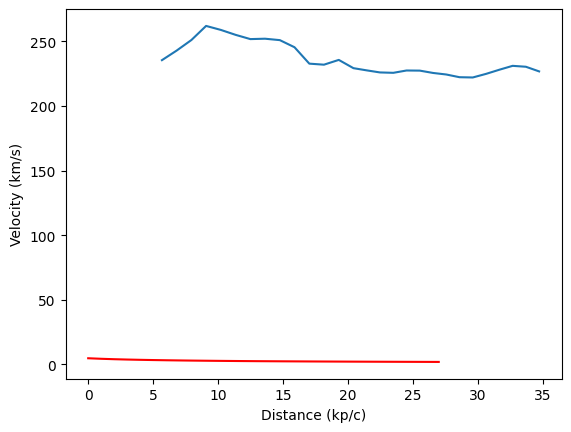

In [2]:
#Path data will be loaded in from
path = 'galaxy_rotation_2006.txt'
table = aio.read(path)
print(f"Loaded file from {path}\n Loaded data:\n")
print(table)
dis = table["col2"]
vol = table["col3"]

#Create initial chart from input data, set labels
plt.plot(dis, vol)
plt.xlabel("Distance (kp/c)")
plt.ylabel("Velocity (km/s)")

'''
Using data loaded in from file, calculate orbital velocity

In this case, we are calculating the orbital velocity of
the milky way if its only mass were the central black hole
'''
mass = 3e7 * au.solMass

def calculate_orbital_velocity(M, r):
    ret_val = np.sqrt((ac.G * M) / r)
    return ret_val

vel_ret = np.zeros(np.shape(dis)) * au.km / au.s
for i, radius in enumerate(dis):
    radius_with_units = radius * 1000 * au.parsec
    orb_velocity = calculate_orbital_velocity(mass, radius_with_units)
    print(f'The orbital velocity at radius {radius} is {orb_velocity.to(au.km / au.s)}')
    vel_ret[i] = orb_velocity

#Plot black hole data
plt.plot(vel_ret, color = 'red', label = 'With only Supermassive Black Hole')
plt.show()